# TFIDF Vectorization and Random Forests Model

In [1]:
# Standard data science imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in X_train, X_test, y_train, y_test

X_train=pd.read_csv('../datasets/X_train.csv')['selftext']
X_test=pd.read_csv('../datasets/X_test.csv')['selftext']
y_train=pd.read_csv('../datasets/y_train.csv')['subreddit']
y_test=pd.read_csv('../datasets/y_test.csv')['subreddit']

In [3]:
# Model imports

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [4]:
# print to quick check on datasets

print(X_train.shape)
pd.DataFrame(X_train).head()

(1364,)


,selftext
0,one of our housekeeper is pretty known for bei...
1,i run a small hotel with a hand operated eleva...
2,tonight i had a couple of obviously homeless f...
3,i m not looking forward into going to work ton...
4,an earlier post today about a lady not underst...


In [5]:
print(X_test.shape)
pd.DataFrame(X_test).head()

(455,)


,selftext
0,my poor coworker who is black but an absolute ...
1,before i begin i want to point out that no one...
2,i ve been working at a restaurant for five yea...
3,mini rant the joy of mood swing at work just h...
4,another tale from the crazy night audit lady t...


In [6]:
print(y_train.shape)
pd.DataFrame(y_train).head()

(1364,)


,subreddit
0,1
1,1
2,1
3,0
4,1


In [7]:
print(y_test.shape)
pd.DataFrame(y_test).head()

(455,)


,subreddit
0,0
1,1
2,0
3,1
4,1


In [8]:
# Model imports

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## TFIDF Vectorization and Random Forests combined into a Pipeline

Running GridSearchCV and tuning the hyperparameters accordingly to optimize the model.

In [9]:
# setting my cv_var as 10

cv_var=10

In [10]:
# importing Random Forest

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor


In [11]:
# Instantiating pipeline for TFIDF Vectorization and Random Forests.

# TFIDF Vectorizer object will have token pattern = "[a-z]+[']?[a-z]*".
# It will allow words like 'I've' stay as they are.
# It will also remove pure numbers.
# 'english' stop_words removed.


pipe_tvec_rf = Pipeline([
    ("tvec", TfidfVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("rf", RandomForestClassifier())
    ])


In [12]:
pipe_params_tvec_rf = {
    'tvec__max_features': [30, 60, 90],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3],
    'tvec__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[100,200,500],
    'rf__max_depth':[3,4]
}


In [13]:
# Fitting and running GridSearchCV

gs_tvec_rf = GridSearchCV(pipe_tvec_rf, param_grid=pipe_params_tvec_rf, cv=cv_var, n_jobs=-2, verbose=1)
gs_tvec_rf.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-2)]: Done 1244 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-2)]: Done 1794 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-2)]: Done 2160 out of 2160 | elapsed: 10.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [14]:
print(gs_tvec_rf.best_score_)
gs_tvec_rf.best_params_

0.9215542521994134


{'rf__max_depth': 4,
 'rf__n_estimators': 500,
 'tvec__max_df': 0.3,
 'tvec__max_features': 90,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [15]:
gs_tvec_rf.score(X_train, y_train)

0.9376832844574781

In [16]:
gs_tvec_rf.score(X_test, y_test)

0.9538461538461539

Further tune hyperparameters to achieve a better score:

In [18]:
pipe_params_tvec_rf_final = {
    'tvec__max_features': [90,200,500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.3, .5, .7],
    'tvec__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[200, 300, 500],
    'rf__max_depth':[3,4]
}
gs_tvec_rf_final = GridSearchCV(pipe_tvec_rf, param_grid=pipe_params_tvec_rf_final, cv=cv_var, n_jobs = -2, verbose=1)
gs_tvec_rf_final.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-2)]: Done 1244 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-2)]: Done 1794 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-2)]: Done 2160 out of 2160 | elapsed: 13.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [19]:
print(gs_tvec_rf_final.best_score_)
gs_tvec_rf_final.best_params_

0.9618768328445748


{'rf__max_depth': 4,
 'rf__n_estimators': 200,
 'tvec__max_df': 0.7,
 'tvec__max_features': 200,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [20]:
print(gs_tvec_rf_final.score(X_train, y_train))
print(gs_tvec_rf_final.score(X_test, y_test))

0.9655425219941349
0.9626373626373627


## Predictions and Confusion Matrix

In [21]:
# Generate predictions

preds_tvec_rf_final = gs_tvec_rf_final.predict(X_test)

In [22]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [23]:
# Generate a confusion matrix.

confusion_matrix(y_test, preds_tvec_rf_final)

array([[235,   3],
       [ 14, 203]], dtype=int64)

In [24]:
tn_tvec_rf, fp_tvec_rf, fn_tvec_rf, tp_tvec_rf = confusion_matrix(y_test, preds_tvec_rf_final).ravel()

In [25]:
print("True Negatives: %s" % tn_tvec_rf)
print("False Positives: %s" % fp_tvec_rf)
print("False Negatives: %s" % fn_tvec_rf)
print("True Positives: %s" % tp_tvec_rf)

True Negatives: 235
False Positives: 3
False Negatives: 14
True Positives: 203


In [26]:
# Specificity of test set

spec_tvec_rf = tn_tvec_rf/(tn_tvec_rf+fp_tvec_rf)

print(f'Specificity: {round(spec_tvec_rf,3)}')

Specificity: 0.987


In [27]:
# Sensitivity/Recall of test set

sens_tvec_rf = tp_tvec_rf/(tp_tvec_rf+fn_tvec_rf)

print(f'Sensitivity: {round(sens_tvec_rf,3)}')

Sensitivity: 0.935


In [28]:
# Precision of test set

prec_tvec_rf = tp_tvec_rf/(tp_tvec_rf+fp_tvec_rf)

print(f'Precision: {round(prec_tvec_rf,3)}')

Precision: 0.985


In [29]:
# F1 score of test set

f1_tvec_rf = 2 * ((prec_tvec_rf * sens_tvec_rf)/(prec_tvec_rf + sens_tvec_rf))

print(f'F1: {round(f1_tvec_rf,3)}')

F1: 0.96


## Relationship between Sensitivity and Specificity

In [30]:
print(len(gs_tvec_rf_final.predict(X_test)))
gs_tvec_rf_final.predict(X_test)[0:5]

455


array([0, 1, 0, 1, 1], dtype=int64)

In [31]:
print(len(gs_tvec_rf_final.predict_proba(X_test)))
gs_tvec_rf_final.predict_proba(X_test)[0:5]

455


array([[0.78400393, 0.21599607],
       [0.28385272, 0.71614728],
       [0.80045753, 0.19954247],
       [0.32520652, 0.67479348],
       [0.12438411, 0.87561589]])

In [32]:
# Creating a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs_tvec_rf_final.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,'pred_probs':pred_proba})

print(pred_df.shape)
pred_df.head()

(455, 2)


,true_values,pred_probs
0,0,0.215996
1,1,0.716147
2,0,0.199542
3,1,0.674793
4,1,0.875616


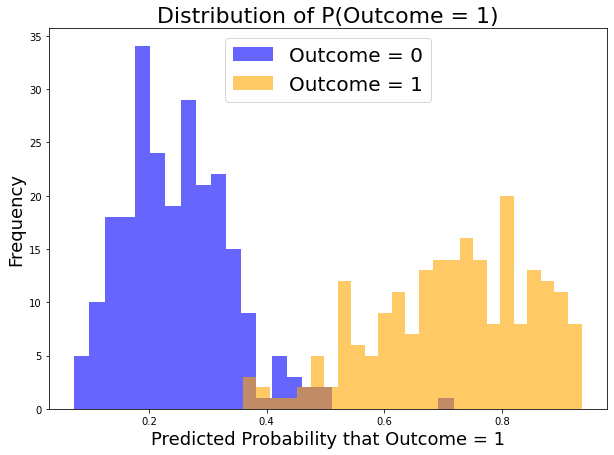

In [33]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

## Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.

## ROC Area Under Curve (AOC)

The more area under this blue curve is, the better separated our distributions are.


We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.

In [34]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [35]:
# Calculate score.
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9958564070789606

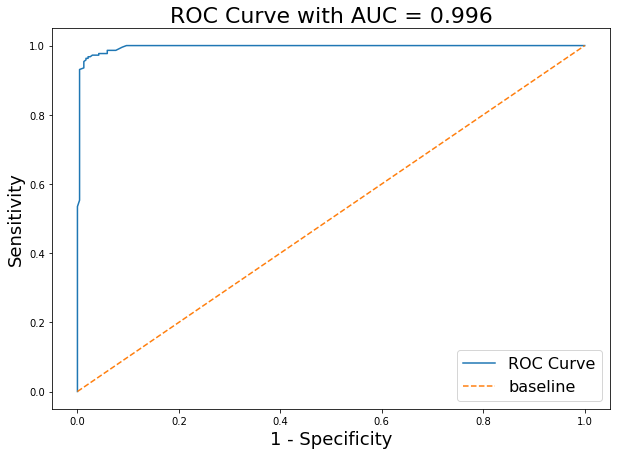

In [36]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Random Forests -> No Coefficients; Sample Decision Tree Visualization Instead

In [37]:
# Restating best parameters obtained through GridSearchCV
gs_tvec_rf_final.best_params_

{'rf__max_depth': 4,
 'rf__n_estimators': 200,
 'tvec__max_df': 0.7,
 'tvec__max_features': 200,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [38]:
# Instantiate TFIDF Vectorizer based on best parameters, fitting and transforming 

tvec_rf_opt_vectorizer = TfidfVectorizer(token_pattern="[a-z]+[']?[a-z]*", 
                                             stop_words = 'english',
                                             lowercase=True,
                                             max_df = 0.5,
                                             max_features = 90,
                                             min_df = 2,
                                             ngram_range = (1, 2)
                                        )

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

X_train_tvec_rf_opt = tvec_rf_opt_vectorizer.fit_transform(X_train)

X_test_tvec_rf_opt = tvec_rf_opt_vectorizer.transform(X_test)

# Converting to array.
X_train_tvec_rf_opt= X_train_tvec_rf_opt.toarray()



In [39]:
# Fit Random Forests model to TFIDF Vectorizer processed training data.

tvec_rf_opt = RandomForestClassifier(max_depth = 3,
                                     n_estimators = 500)

tvec_rf_opt.fit(X_train_tvec_rf_opt, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
# One Sample Decision Tree for Visualization
# Make a single regression tree model with max_depth 3


dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train_tvec_rf_opt, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


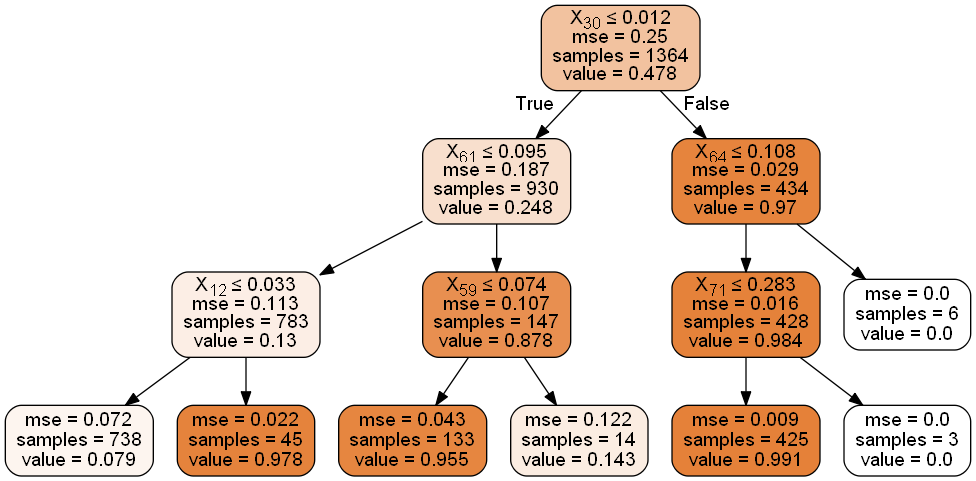

In [41]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus


dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  